In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error
import timeit

In [2]:
start_train = timeit.timeit()

In [3]:
import pandas as pd

df = pd.read_csv (r'hysteresis_v_150_1hz.csv')
print (df)


       Unnamed: 0        0  -1.6174316        0.1
0             NaN   0.0002   -1.724243    0.00000
1             NaN   0.0004   -1.655579    0.00000
2             NaN   0.0006   -1.754761    0.00000
3             NaN   0.0008   -1.701355    0.00000
4             NaN   0.0010   -1.701355    0.00000
...           ...      ...         ...        ...
49995         NaN   9.9992  -13.984680 -117.59304
49996         NaN   9.9994  -13.916016 -117.70996
49997         NaN   9.9996  -13.931274 -117.82671
49998         NaN   9.9998  -13.839722 -117.94326
49999         NaN  10.0000  -13.938904 -118.05964

[50000 rows x 4 columns]


In [4]:
df.shape

(50000, 4)

In [5]:
data = df.to_numpy()
data.shape

(50000, 4)

In [6]:
data_col = data[:,1:4]

In [7]:
data_final = data_col[35000:45000,:]

In [8]:
data_final.shape

(10000, 3)

In [9]:
t = data_final[:,0]
t.shape

(10000,)

In [10]:
x = data_final[:,2]
x.shape

(10000,)

In [11]:
y = data_final[:,1]
y = y.reshape(-1,1)
y.shape

(10000, 1)

In [12]:
#plt.grid(linestyle='dotted')
#t = np.linspace(0,20*pi,1000)
#x = np.sin(t)
#plt.plot(t, x)
#plt.xlabel('Time', fontsize = 20)
#plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#plt.savefig("Results/test2_input.png", dpi = 300, bbox_inches='tight')

In [13]:
t.shape

(10000,)

In [14]:
#plt.plot(t,x)
#x_exact = 150*np.sin(2*pi*t-46.18)
x_exact = 150*np.sin(6.28318530724*t-46.2178545458)


In [15]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((x - x_exact)**2)/np.mean(x_exact**2)
print("Relative Error Test in x: ", relative_error_test*100, "%")

Relative Error Test in x:  6.977585424072029e-13 %


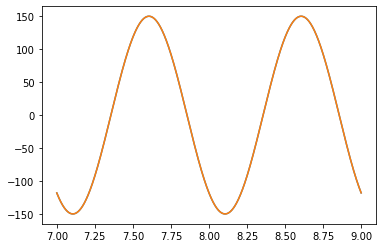

In [16]:
plt.plot(t,x)
plt.plot(t,x_exact)

In [17]:
dx = fd._differentiate(x, t)

In [18]:
#plt.plot(t,dx)

In [19]:
mdx = np.abs(dx)

In [20]:
#plt.plot(t, mdx)

In [21]:
#def model(y, t):
 #   dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
  #  return dydt

In [22]:
#y0 = 0
#y = odeint(model, y0, t)

In [23]:
y.shape

(10000, 1)

In [24]:
#plt.plot(t,y)

In [25]:
#plt.plot(x, y)

In [26]:
dy = fd._differentiate(y, t)
#plt.plot(t, dy)

In [27]:
my = np.abs(y)
my = my.reshape(-1,)
mdy = np.abs(dy)
mdy = mdy.reshape(-1,)

In [28]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
#terms = t1-0.5*t2-2*t3
#plt.plot(t,terms)
#plt.plot(t, dy)

In [29]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [30]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = -0.993 x0 + 0.237 x1 + 0.126 x2
(x1)' = 1.000 x2
(x2)' = -0.156 1 + -39.477 x1
(x3)' = -145367.331 1 + 2065.056 x0 + -257.213 x1 + -5.799 x2 + 68.322 x3 + 3045.972 x4 + -5866.679 x0^2 + 2950.766 x0 x1 + -65.239 x0 x2 + -4.188 x0 x3 + 90.365 x0 x4 + -181.532 x1^2 + 8.186 x1 x2 + 0.539 x1 x3 + -12.476 x1 x4 + 0.468 x2 x4 + -2.767 x3 x4 + -5866.679 x4^2
(x4)' = -817.856 1 + -6.066 x0 + 0.698 x1 + -2.773 x4 + -93.656 x0^2 + 47.384 x0 x1 + -0.859 x0 x2 + -2.956 x1^2 + 0.110 x1 x2 + -93.656 x4^2


In [31]:
end_train = timeit.timeit()
print(end_train - start_train)

-0.007578222000006463


In [32]:
c1 = -0.993
c2 = 0.237
c3 = 0.126
def test_model(y, t):
    #dydt = c1*y + c2*150*np.sin(2*pi*t-46.18) + c3*300*pi*np.cos(2*pi*t-46.18)
    dydt = c1*y + c2*150*np.sin(6.28318530724*t-46.2178545458) + c3*942.477796086*np.cos(6.28318530724*t-46.2178545458)
    return dydt

In [33]:
start_test = timeit.timeit()

In [34]:
ytest_0 = -14.030457
y_test = odeint(test_model, ytest_0, t)

In [35]:
end_test = timeit.timeit()
print(end_test - start_test)

-0.0006696319999832667


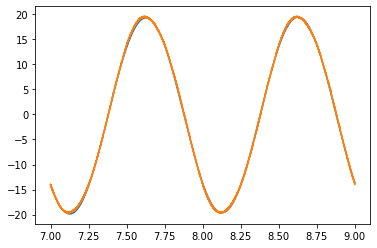

In [36]:
plt.plot(t, y_test)
plt.plot(t, y)

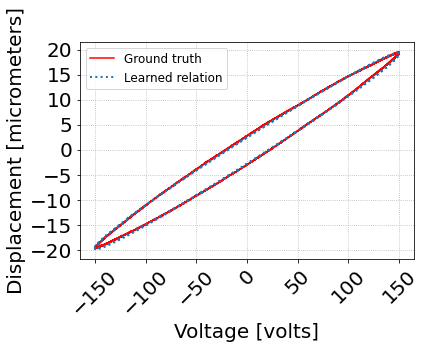

In [37]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage [volts]', fontsize = 20)
plt.ylabel('Displacement [micrometers]', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Pics/Slide14_loop.png", dpi=1000,bbox_inches='tight')

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2 = r2_score(y, y_test)

In [40]:
r2

0.9996745361205122

In [41]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.03254531539011475 %


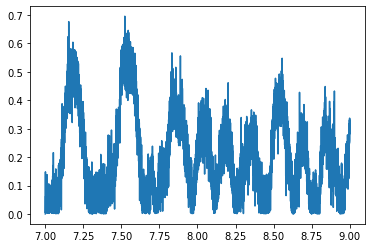

In [42]:
err_t = np.abs(y-y_test)
plt.plot(t, err_t)

In [43]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, y_test))
nrmse = rmse*2.5
nrmse

0.6243508067380557